In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("dataset.xlsx")


# PRE-PROCESSING 

In [2]:
df = data.copy()
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Création des sous-ensembles ( Suite au EDA)

In [3]:
missing_rate = df.isna().sum() / df.shape[0]

In [4]:
blood_columns = list(df.columns[(missing_rate < 0.9) & ( missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & ( missing_rate > 0.75)])

In [5]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [6]:
df  = df[blood_columns + viral_columns + key_columns]

In [7]:
df.head()

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Patient age quantile,SARS-Cov-2 exam result
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,negative
1,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,17,negative
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,negative
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,negative
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,15,negative


# TrainTest - Nettoyage - Encodage

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
trainset , testset = train_test_split(df , test_size= 0.2 , random_state = 0)

In [10]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [11]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [12]:
for col in df.select_dtypes("object"):
    print(f'{col :-<50}  {df[col].unique()}')

Respiratory Syncytial Virus-----------------------  [nan 'not_detected' 'detected']
Influenza A---------------------------------------  [nan 'not_detected' 'detected']
Influenza B---------------------------------------  [nan 'not_detected' 'detected']
Parainfluenza 1-----------------------------------  [nan 'not_detected' 'detected']
CoronavirusNL63-----------------------------------  [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus----------------------------  [nan 'detected' 'not_detected']
Coronavirus HKU1----------------------------------  [nan 'not_detected' 'detected']
Parainfluenza 3-----------------------------------  [nan 'not_detected' 'detected']
Chlamydophila pneumoniae--------------------------  [nan 'not_detected' 'detected']
Adenovirus----------------------------------------  [nan 'not_detected' 'detected']
Parainfluenza 4-----------------------------------  [nan 'not_detected' 'detected']
Coronavirus229E-----------------------------------  [nan 'not_detected' 'det

In [13]:
df.select_dtypes("object").columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'SARS-Cov-2 exam result'],
      dtype='object')

In [14]:
#for col in df.select_dtypes("object"):
    #df[col] = df[col].map(code)

In [15]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)
        
    return df
    

In [16]:
encodage(df)

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Patient age quantile,SARS-Cov-2 exam result
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0
1,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
5640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,0
5641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
5642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0


In [17]:
df.dtypes.value_counts()

float64    31
int64       2
dtype: int64

In [18]:
def feature_engineering(df):
    df["est_malade"] = np.sum(df[viral_columns] , axis = "columns") >=1
    df = df.drop(viral_columns , axis = "columns")
    return df
    

In [19]:
def imputation(df):
    return df.dropna(axis ="rows")

In [20]:
def preprocessing(df):
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result' , axis = "columns")
    y = df['SARS-Cov-2 exam result']
    print(y.value_counts())
    
    return X,y

In [21]:
X_train , y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\KOUSSAY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KOUSSAY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\KOUSSAY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KOUSSAY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Modelisation 

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.preprocessing import PolynomialFeatures , StandardScaler

In [24]:
preprocessor = make_pipeline(PolynomialFeatures(2 , include_bias= False ),SelectKBest(f_classif , k=5))

In [25]:
RandomForest = make_pipeline(preprocessor , RandomForestClassifier(random_state= 5 ))
AdaBoostClassifier = make_pipeline(preprocessor , AdaBoostClassifier(random_state= 5 ))
SVM = make_pipeline(preprocessor , StandardScaler() , SVC(random_state = 5 ))
KNN = make_pipeline(preprocessor , StandardScaler() , KNeighborsClassifier())
 

In [26]:
list_of_models = {'RandomForest' : RandomForest ,
                  'AdaBoostClassifier' : AdaBoostClassifier , 
                  'SVM' : SVM ,
                  'KNN' : KNN}

RandomForest
[[89  6]
 [12  4]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        95
           1       0.40      0.25      0.31        16

    accuracy                           0.84       111
   macro avg       0.64      0.59      0.61       111
weighted avg       0.81      0.84      0.82       111

[ 36  73 109 146 182 219 255 292 328 365]
AdaBoostClassifier
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

[ 36  73 109 146 182 219 255 292 328 365]
SVM
[[91  4]
 [12  4]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        95
           1       0.50      0.25      0.33        16

    a

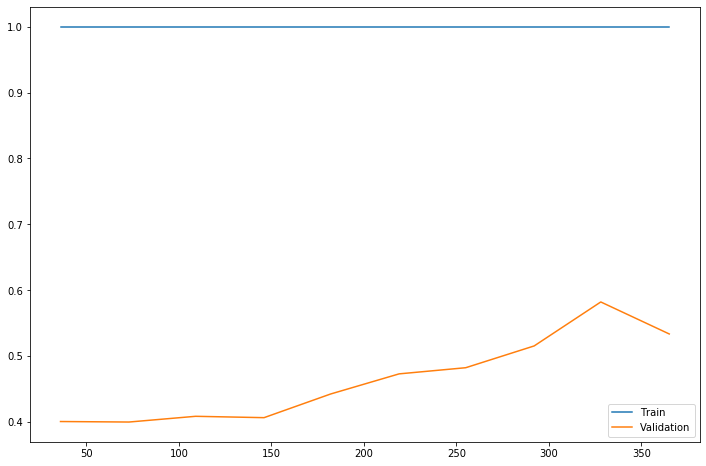

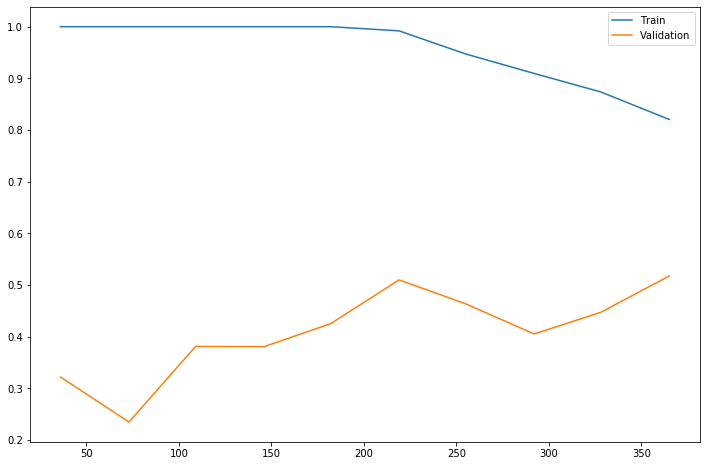

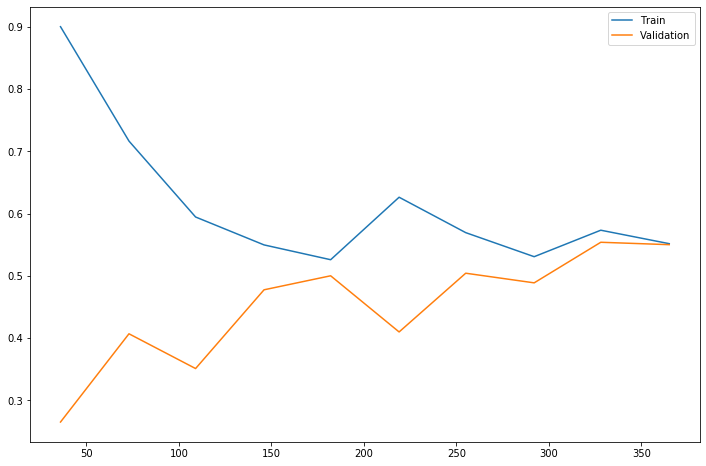

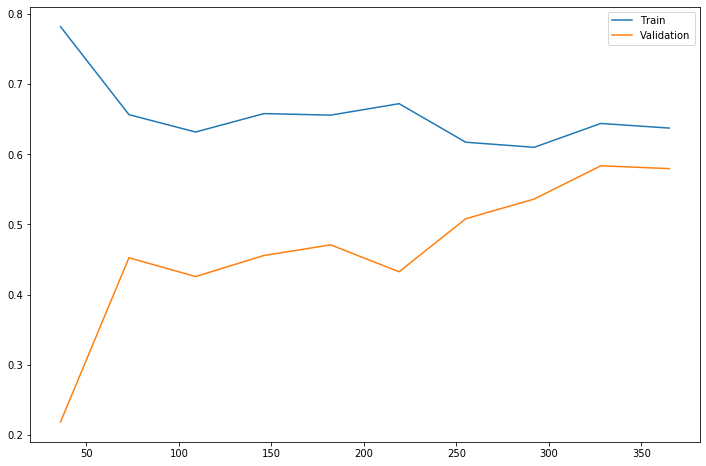

In [35]:
for name,model in list_of_models.items():
    print(name)
    evaluation(model)

## Procédure d'évaluation

In [36]:
from sklearn.metrics import f1_score , confusion_matrix , classification_report
from sklearn.model_selection import learning_curve

In [37]:
def evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    N , train_score , val_score = learning_curve(model , X_train , y_train,
                                                    cv= 4 , scoring = "f1" , 
                                                 train_sizes = np.linspace(0.1 , 1 , 10 ))
    
 
    print(N)
    plt.figure(figsize= (12,8))
    plt.plot(N,train_score.mean(axis = 1) , label = "Train")
    plt.plot(N,val_score.mean(axis = 1) , label = "Validation")
    plt.legend()

[[90  5]
 [12  4]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        95
           1       0.44      0.25      0.32        16

    accuracy                           0.85       111
   macro avg       0.66      0.60      0.62       111
weighted avg       0.82      0.85      0.83       111

[ 36  73 109 146 182 219 255 292 328 365]


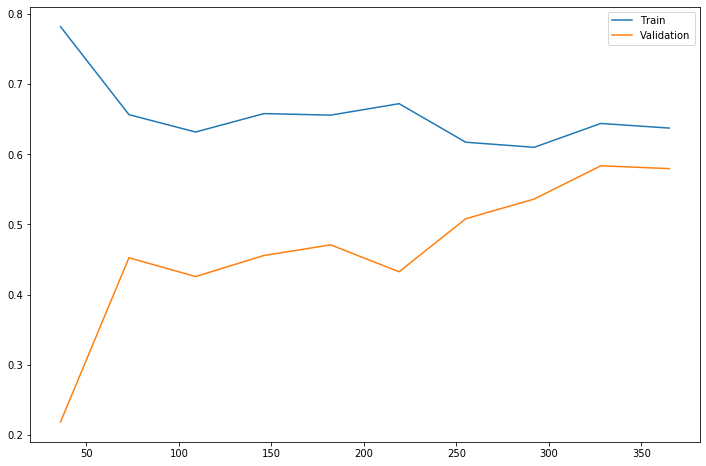

In [38]:
evaluation(model)

# Optimisation 

In [39]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [40]:
SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=5,
                                              score_func=<function f_classif at 0x0000023DE8E0EDC8>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', ker

In [41]:
hyper_params = {'svc__gamma' : [1e-3 , 1e-4],
                'svc__C': [1,10,100,1000] ,
               'pipeline__polynomialfeatures__degree' : [ 2 , 3,4],
               'pipeline__selectkbest__k' : range(40,60)}

In [42]:
grid = RandomizedSearchCV(SVM , hyper_params , scoring = "recall" , cv = 4 , n_iter= 40)


In [43]:
grid.fit(X_train,y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)
print(classification_report(y_test,y_pred))


{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 45, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        95
           1       0.56      0.56      0.56        16

    accuracy                           0.87       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.87      0.87      0.87       111



[[88  7]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        95
           1       0.56      0.56      0.56        16

    accuracy                           0.87       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.87      0.87      0.87       111

[ 36  73 109 146 182 219 255 292 328 365]


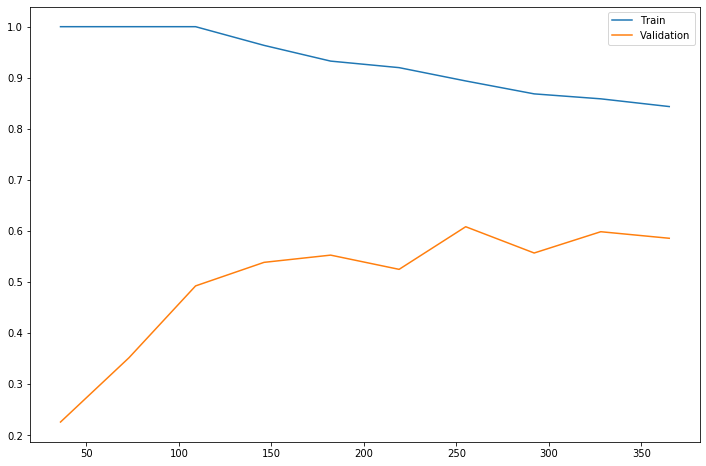

In [44]:
evaluation(grid.best_estimator_)

# Precision Recall Curve 

In [45]:
from sklearn.metrics import precision_recall_curve

In [46]:
precision , recall , thresold = precision_recall_curve(y_test  ,grid.best_estimator_.decision_function(X_test) ) 
                            

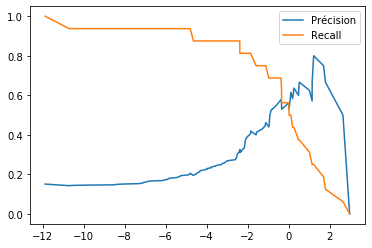

In [47]:
plt.plot(thresold , precision[:-1] , label ="Précision")
plt.plot(thresold , recall[:-1] , label ="Recall")
plt.legend()


In [48]:
grid.best_estimator_.decision_function(X_test)

array([-9.61701720e-01, -2.43445472e+00, -7.36280936e+00, -4.47765233e+00,
       -1.05710378e+01, -9.40194467e-01, -4.87661599e+00,  1.70821100e+00,
       -3.23735991e+00, -8.45678301e+00, -2.37696414e+00, -5.54356255e+00,
       -8.52087168e+00, -1.07119221e+01, -1.31754916e+01,  1.99271575e-01,
       -3.05470733e+00,  7.45119753e-02, -4.33008129e+00, -5.87379956e-01,
       -4.12644882e+00, -5.88033180e+00, -7.11243981e+00, -9.92242617e+00,
       -5.36814922e+00, -7.94176792e+00, -7.18761735e+00, -2.11154757e+00,
       -3.11072238e+00, -6.03975208e+00, -9.08338535e-01, -4.84652597e+00,
       -2.49033870e+00, -6.92606923e+00, -3.64183732e-01, -4.64489873e+00,
       -1.18686288e+01, -1.29331638e+00,  1.13744164e-01, -5.41418927e+00,
       -3.77396432e+00, -1.70662528e+01, -2.53103967e+00, -6.94452198e+00,
       -6.10342172e+00, -2.58828328e+00, -2.97046965e+00, -3.50150143e+00,
        1.01871674e+00,  1.15066255e+00, -4.31306955e+00, -2.29178337e+00,
       -3.98778735e+00, -

In [49]:
def model_final(model , X , thresold = 0):
    return model.decision_function(X) > thresold

In [50]:
y_pred = model_final(grid.best_estimator_, X_test , thresold= -0.25)
y_pred

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [51]:
f1_score(y_test,y_pred)

0.5625

In [52]:
from sklearn.metrics import recall_score 

In [53]:
recall_score(y_test,y_pred)

0.5625